# *To build a Decision Tree Classifier to predict whether a customer will purchase a product or service based on demographic and behavioral data*




Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


Load the Dataset

In [8]:
!pip install gdown




In [10]:
import gdown
import pandas as pd

# Google Drive file ID from the shareable link
file_id = '1hOLVwWHcw4KoDbINmsE82Un-4EpA1p7l'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'bank-additional-full.csv'

# Download the file
gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output, sep=';')

# Display the first few rows
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1hOLVwWHcw4KoDbINmsE82Un-4EpA1p7l
To: /content/bank-additional-full.csv
100%|██████████| 5.83M/5.83M [00:00<00:00, 205MB/s]


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

 Preprocess the Data

In [11]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables into numerical format
df = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df.drop('y_yes', axis=1)  # Assuming 'y_yes' is the target variable for purchase
y = df['y_yes']


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


 Split the Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train the Model

In [13]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Evaluate the Model

              precision    recall  f1-score   support

       False       0.94      0.94      0.94     10968
        True       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357

[[10275   693]
 [  668   721]]


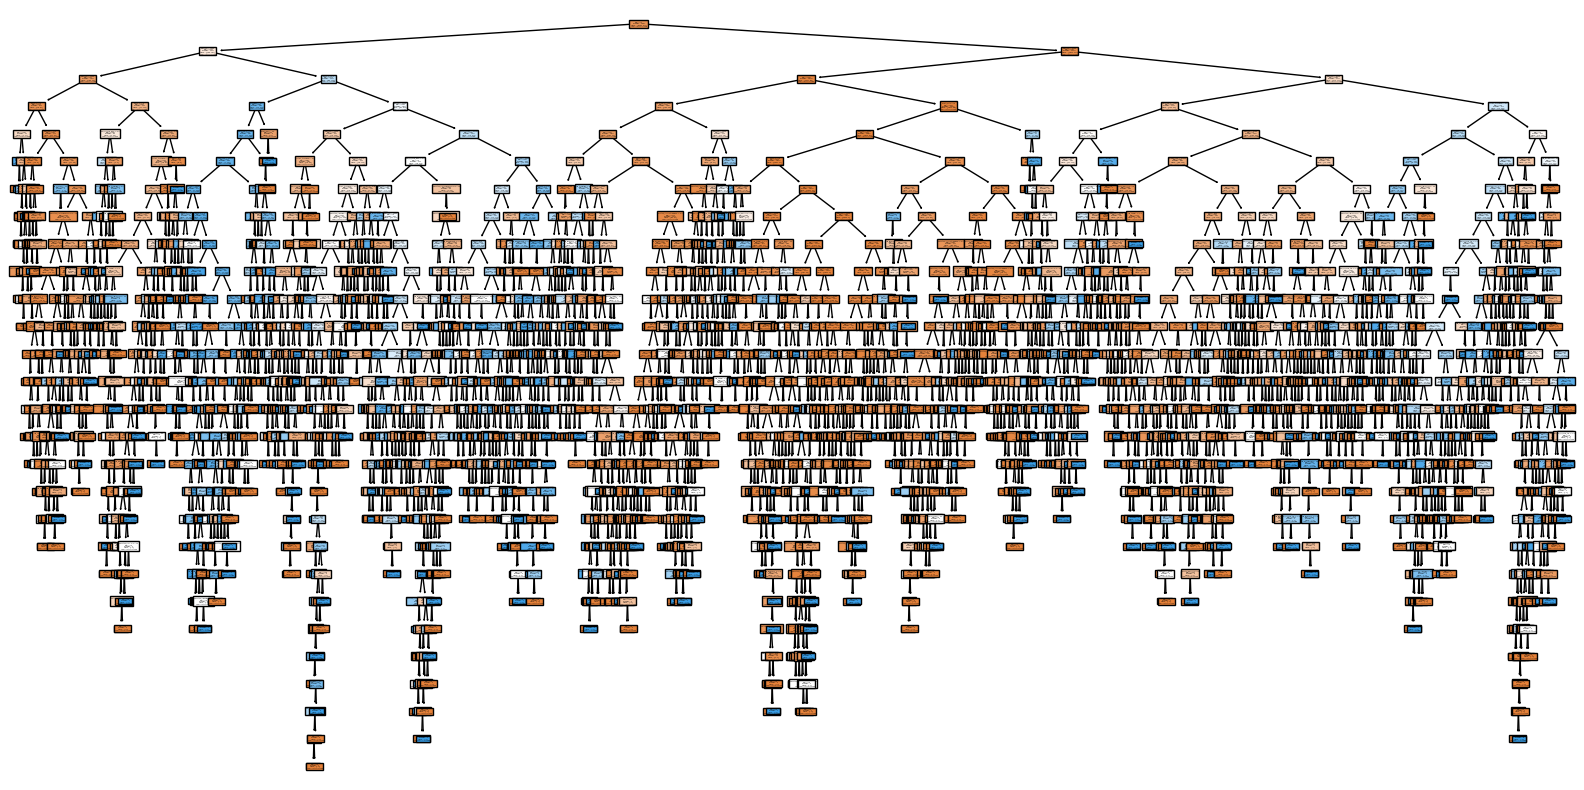

In [16]:
# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()


Tune the Model

In [15]:
# Initialize and train a tuned Decision Tree Classifier
clf_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf_tuned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)